### Documenting the approach

* I will start with importing and sense-checking the data.
* After that I will prepare basic descriptive analysis to see the things as they are
* After that I will start with diagnostic analysis of the data frame

### 'Import' Block
*this cell will be used to store imported libraries and packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### importing the first data frame "Appointments Duration" and doing sense-check

In [2]:
appts_duration = pd.read_csv('actual_duration.csv')
appts_duration.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
appts_duration.shape

(137793, 8)

In [4]:
appts_duration.dtypes

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [5]:
#check if there are missing values
appts_duration.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

### importing the second data frame "Appointments Regional" and doing sense-check

In [6]:
appts_regional = pd.read_csv('appointments_regional.csv')
appts_regional.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [7]:
appts_regional.shape

(596821, 7)

In [8]:
appts_regional.dtypes

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

In [9]:
#check if there are missing values
appts_regional.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [10]:
appts_regional.shape

(596821, 7)

### importing the third data frame "National Categories" and doing sense-check

In [20]:
categories = pd.read_excel('national_categories.xlsx')
categories.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [12]:
categories.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [13]:
categories.shape

(817394, 8)

In [14]:
categories.isna().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [15]:
appts_duration['count_of_appointments'].sum()

np.int64(167980692)

In [16]:
appts_duration['actual_duration'].value_counts()

actual_duration
Unknown / Data Quality    20161
1-5 Minutes               19909
6-10 Minutes              19902
11-15 Minutes             19738
16-20 Minutes             19534
21-30 Minutes             19452
31-60 Minutes             19097
Name: count, dtype: int64

#### Let's start with describing general things as they are.
We will check
* the total number of all appointments per location using *icb_ons code* and National_category.xlsx dataset. I will count ICBs, not GP practices, because ICB is the main unit that is used by NHS fir budget planning.
* will determine the average length of an appointment
* Determine the prevailing type of appointment in each ons location
* Will ty to find out whether there is a particular period when all locations have maximum number of appointment records

In [17]:
#Count how many locations are there in the dataset.
location_count = len(categories['icb_ons_code'].value_counts())
print(f'Total number of Integrated Care Boards: {location_count}')

Total number of Integrated Care Boards: 42


In [18]:
# count all the appointments records per care board from the "National_category" dataset
appts_per_location = categories.groupby('icb_ons_code')['count_of_appointments'].sum()
appts_per_location

icb_ons_code
E54000008    13250311
E54000010     5325790
E54000011     2568487
E54000013     4253394
E54000015     6242530
E54000018     4863552
E54000019     4700180
E54000022     6074027
E54000023     5335653
E54000024     4838515
E54000025     7059966
E54000026     5630586
E54000027    12142390
E54000028     6747958
E54000029     9588891
E54000030     7850170
E54000031     7155030
E54000032     9286167
E54000034     3754540
E54000036     3697369
E54000037     7447758
E54000038     3079318
E54000039     4899508
E54000040     5242176
E54000041     4340449
E54000042     9210625
E54000043     3663418
E54000044     8924264
E54000048     8757248
E54000050    16882235
E54000051     9125945
E54000052     4898540
E54000053     8929398
E54000054    14358371
E54000055     6383746
E54000056     5116300
E54000057    13857900
E54000058     5795343
E54000059     3922181
E54000060     6263489
E54000061     7549415
E54000062     7033637
Name: count_of_appointments, dtype: int64

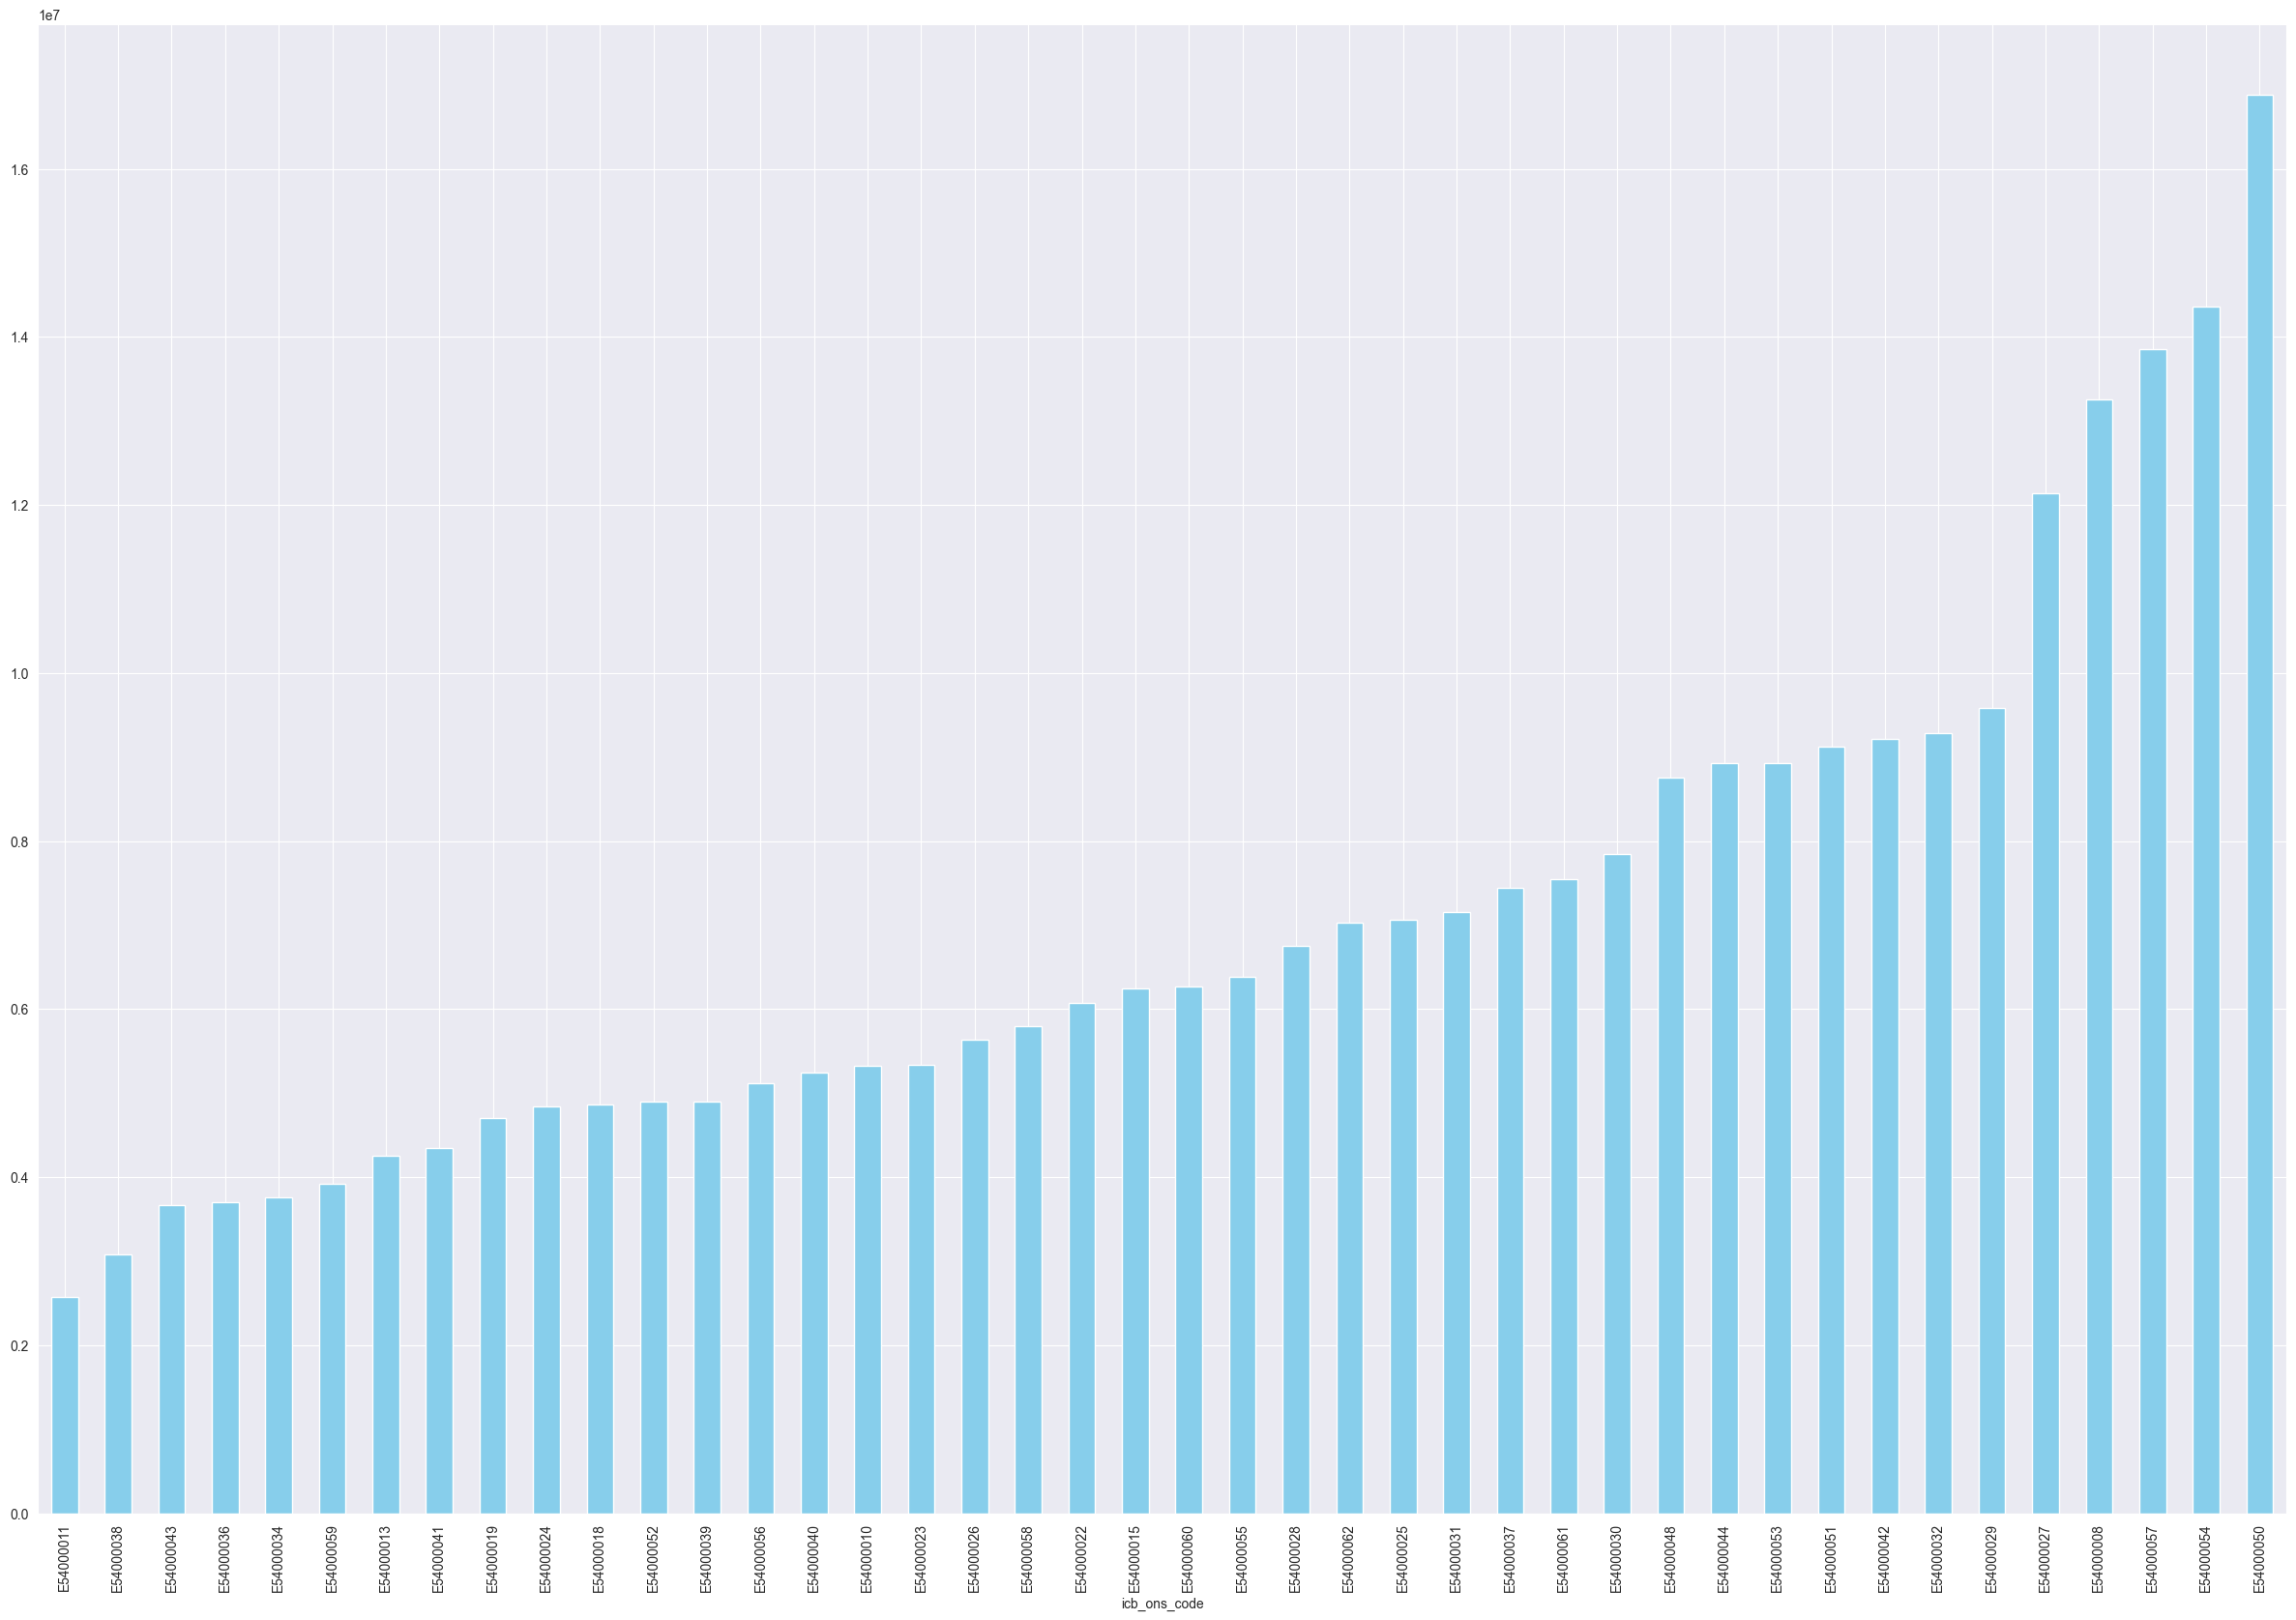

In [43]:
appts_per_location.sort_values().plot(kind='bar', figsize=(30,20), color='skyblue')
plt.title = 'Number of appointments per Integrated Care Board'
plt.xlabel = 'Count of Appointments'
plt.ylabel = 'ICB Code'
plt.show()


### Let's see how many appointments were missed based on "Appointments_regional.csv" set. We'll use *appointment_status*.
Also, we will calculate the loss. According to HNS Fourth Valley, the cost of a missed appointment varies from £177 for GP appointment to £97 for nurse-led and £63 for Other Practice Staff respectively. Since we don't have detailed description, we will combine Other Practice Staff and Unknown together and use mean value of (97+63)/2 = £80.

<Axes: xlabel='appointment_status', ylabel='count'>

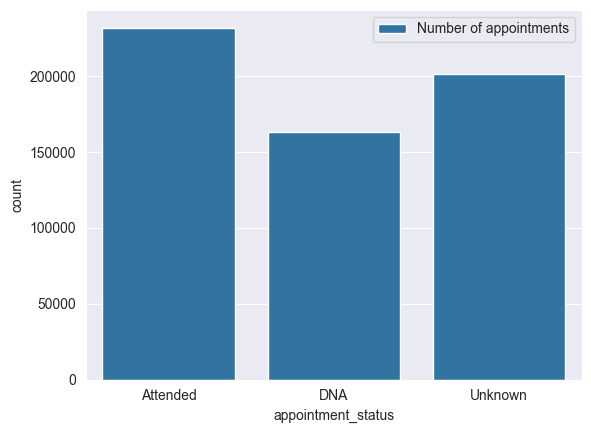

In [56]:
# let's check the overall picture of the appointment statuses
sns.countplot(x=appts_regional['appointment_status'], data=appts_regional)

We can see here that the number of appointments with 'Unknown" status is almost equal, so we can't say exactly whether these appointments were in "Booked", "Attended" or any other status.
Considering significant amount of the appointment with "Unknown" status, I would recommend to revise the reporting mechanism for more precise data collection.

In [51]:
#count the number of missed GP appointments
missed_gp_appts = ((appts_regional['appointment_status'] == 'DNA') & (appts_regional['hcp_type']=='GP')).sum()
print(f"Number of missed appointments with GP: {missed_gp_appts}")

Number of missed appointments with GP: 62788


In [52]:
#calculating missed appointments for other medical staff, including 'Unknown'
other_missed_appts = ((appts_regional['appointment_status'] == 'DNA') & ((appts_regional['hcp_type'] == 'Other Practice staff') |(appts_regional['hcp_type'] == 'Unknown'))).sum()
print(f"Number of missed appointments with Other Practice Staff: {other_missed_appts}")

Number of missed appointments with Other Practice Staff: 100572


In [61]:
#let's calculate the losses due to the missed appointments.

#let's set costs as constants
MISSED_GP_COST = 177
OTHER_MISSED_APPT = 80
GP_total_loss = missed_gp_appts*MISSED_GP_COST
Other_total_loss = other_missed_appts*OTHER_MISSED_APPT
total_loss = GP_total_loss + Other_total_loss
print(f'Total Loss due to the missed appointments with GP  : {GP_total_loss} pounds')
print(f'Total Loss due to missed appointments with Other Practice Staff : {Other_total_loss} pounds')
print(f'Total Loss due to the missed appointments : {total_loss} pounds')

Total Loss due to the missed appointments with GP  : 11113476 pounds
Total Loss due to missed appointments with Other Practice Staff : 8045760 pounds
Total Loss due to the missed appointments : 19159236 pounds
